# Marginal Stability Vehicle Sizing
This sheet uses <code>numpy, matplotlib, simulations, and tank_sizing_9_20</code>.

<code>simulations</code> is developed and maintained (no promises) by Cameron. The current version of the code is 0.0.1 and can be downloaded from github [here](https://github.com/cmflannery/simulations). The source-code is not currently on pip.

In [1]:
from simulations import simulations as sim
unit = sim.unit()
import matplotlib.pyplot as plt
import numpy as np
import tank_sizing_9_20 as tank
from scipy import interpolate as inter

In [2]:
def plot_alt(fig):
    # plot altitude
    ax1 = fig.add_subplot(3,1,1)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,altitude)
    ax1.set_ylabel('Altitude (ft)')

    ax1.set_title('Altitude and Velocity')

    # plot velocity
    ax2 = fig.add_subplot(3,1,2)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,velocity)
    ax2.set_ylabel('Velocity (ft/s)')
    ax2.set_ylim(bottom=-6000)

    # plot acceleration
    gees = [x/g0Imp for x in acceleration]
    ax3 = fig.add_subplot(3,1,3)
    ax3.xaxis.grid(linewidth=1.0)
    ax3.yaxis.grid(linewidth=1.0)
    ax3.grid(True, linewidth=1)
    ax3.plot(time,gees)
    ax3.set_ylabel('Acceleration (gees)')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylim(bottom=-2)
    
def plot_thrust(fig):
    # plot thrust
    ax = fig.add_subplot(2,1,1)
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    ax.grid(True, linewidth=1)
    ax.plot(time,thrust)
    ax.set_ylabel('Thrust (lbf)')
    
    ax.set_title('Thrust and Drag')
    
    # plot drag
    ax1 = fig.add_subplot(2,1,2)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,drag)
    ax1.set_ylabel('Drag (lbf)')
    ax1.set_ylim(0,2e5)

In [49]:
thrust_sl = 5000 # s

nengines = 1
burntime = 40  # s
chamberpressure = 500 #psi
Isp = 281.622 #s
#Isp as a function of chamber pressure might be a useful addition
mdot = nengines*thrust_sl/(Isp) #lbm/s (calc results in lbf/s, but conversion factor is 1)
twratio = 50  # estimated thrust 2 weight ratio
mixtureratio = 2.275
g0Metric = 9.81 #m/s^2
g0Imp = 32.17 #ft/s^2

mstructure = 249.12  # lbm
mavionics = 22.67  # lbm
msystems = 80 # lbm
mmisc = 0 #lbm
#mengine = thrust_sl*nengines/twratio #lbm
mpropulsion = 47.79 # lbm
mpropellant = mdot*burntime


diameter = 16 #in
diam_tank = 12 #in

mRP1 = mpropellant / (mixtureratio + 1)
mLOx = mpropellant - mRP1

rp1tankpressure = 700 #psi
loxtankpressure = 600 #psi
HEinitialpressure = 6000 #psi

mtank, mHe, lenloxin, lenrp1in = tank.getTankMassLen(loxtankpressure,rp1tankpressure,diam_tank,mpropellant,HEinitialpressure)
mpress = 282.38 # lbm, mass of pressurant tank

mpropellant += mHe

refArea = np.pi*((diameter/2)**2) / 144 #ft^2
coef_drag = 0.37

m0 = mpropulsion + mpropellant + mstructure + mavionics + msystems + mmisc + mtank + mpress
m0 = 610 + mpropellant

print('### STRUCTURAL PARAMETERS ###')
print('Propellant Mass = %.2f lbm' % (mpropellant - mHe))
print('Helium Mass =  %.2f lbm'  % mHe)
print('Propulsion Mass = %.2f lbm' % mpropulsion)
print('Tank Mass = %.2f lbm' % mtank)
print('Pressurant Tank Mass = %.2f lbm' % mpress)
print('Structural Mass (inc. Tanks) = %.2f lbm' % (mstructure + mtank + mpress))
print('Systems Mass = %.2f lbm' % msystems)
print('Misc Mass = %.2f lbm' % mmisc)
print('Avionics Mass = %.2f lbm' % mavionics)
print('Mass Propellant Ratio (Mprop/M0) %.2f' % (mpropellant/m0))
print('Total Wet Mass: %.2f lbm' % (m0))
print('Total Dry Mass: %.2f lbm' % (m0-mpropellant))
print('\n### ENGINE PARAMETERS ###')
print('Thrust = %d lbf' % (thrust_sl*nengines))
print('Isp = %.2f s' % Isp)
print('mdot = %.2f lbm/s' % mdot)
print('Total Impulse = %i lbf-s' % (thrust_sl*burntime*nengines))

print('\n### OTHER IMPORTANT THINGS ###')
print('Burn Time = %.2f s' % burntime)

initialConditions = {
    'time': 0,
    'velocity': 0,
    'flight_angle': 0,
    'flight_heading': np.deg2rad(90),
    'latitude': 0,
    'longitude': 0,
    'altitude': 4460, # ft
    'mass': unit.lbmToSlug(m0),
    'heat': 0,
    'lift_coefficient': 0,
    'bank_angle': 0,
    'reference_area': refArea,
    'coef_drag': coef_drag
}

engines = {
    'thrust_sl': thrust_sl,
    'thrust_angle': 0,
    'Isp': Isp,
    'Ae': 2.690978,
    'nengines': nengines
}

timestep = .1

### STRUCTURAL PARAMETERS ###
Propellant Mass = 710.17 lbm
Helium Mass =  8.85 lbm
Propulsion Mass = 47.79 lbm
Tank Mass = 120.70 lbm
Pressurant Tank Mass = 282.38 lbm
Structural Mass (inc. Tanks) = 652.20 lbm
Systems Mass = 80.00 lbm
Misc Mass = 0.00 lbm
Avionics Mass = 22.67 lbm
Mass Propellant Ratio (Mprop/M0) 0.54
Total Wet Mass: 1329.02 lbm
Total Dry Mass: 610.00 lbm

### ENGINE PARAMETERS ###
Thrust = 5000 lbf
Isp = 281.62 s
mdot = 17.75 lbm/s
Total Impulse = 200000 lbf-s

### OTHER IMPORTANT THINGS ###
Burn Time = 40.00 s


In [50]:
itsatest = sim.Rocket(initialConditions, engines,burntime,timestep)
altitude, velocity, acceleration, mass, time, thrust, drag, Q, rho, temperature, mach = itsatest.run()

4656.955047
4656.9543430673075
4656.974950693228
4657.016203880147
4657.078135550028
4657.160776890185
4657.264157340226
4657.388304578549
4657.5332445083795
4657.699001243382
4657.885597092795
4658.093052546127
4658.321386257381
4658.57061502882
4658.840753821145
4659.131815843975
4659.443812510239
4659.776753425674
4660.130646411342
4660.505497423142
4660.901310133943
4661.318086111236
4661.755825483441
4662.214526806771
4662.694186817493
4663.1948000662915
4663.716358276661
4664.258851859465
4664.822270107781
4665.406600366181
4666.011826945339
4666.637931961687
4667.284896974606
4667.952702013908
4668.641323160603
4669.350735026401
4670.080912140947
4670.831825829185
4671.603443932933
4672.395734877268
4673.208664146363
4674.042196066751
4674.89629028257
4675.770908029551
4676.666007061844
4677.581541438881
4678.517467350464
4679.473735040794
4680.4502947057845
4681.447095797003
4682.464082166437
4683.501200466098
4684.5583909622055
4685.635595388185
4686.732751908874
4687.84979657

Apogee = 399622 ft
Apogee = 121 km
Max Velocity = 4558.81 ft/s
Max Acceleration = 6.36 gees
Max Q = 15.25 psi
Max Drag = 1134.23 lbf


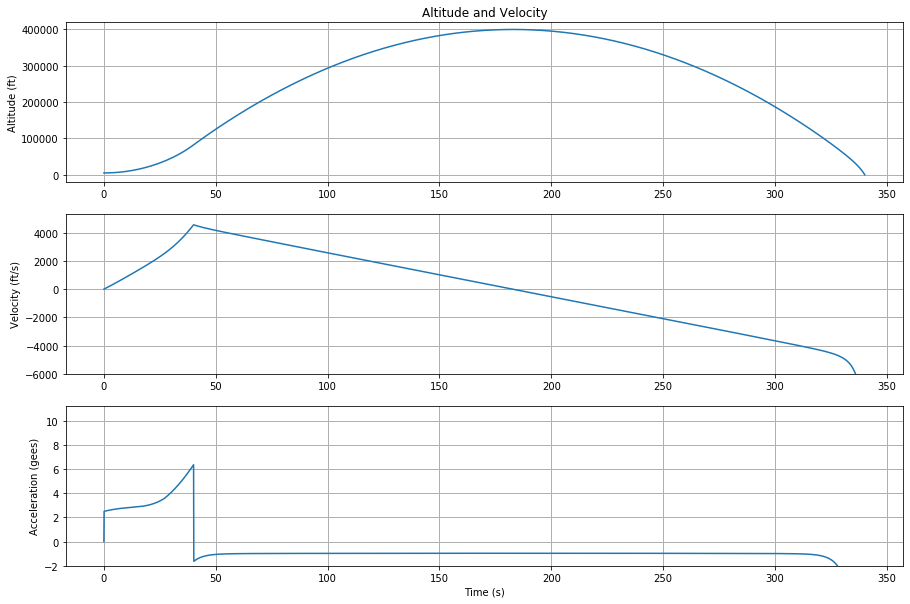

In [51]:
kmaltitude = [unit.ftToM(x)/1000 for x in altitude]
QPsi = [unit.psfToPsi(x) for x in Q]

print('Apogee = %d ft' % max(altitude))
print('Apogee = %d km' % max(kmaltitude))
print('Max Velocity = %.2f ft/s' % max(velocity))
gees = [a/g0Imp for a in acceleration]
print('Max Acceleration = %.2f gees' % max(gees))
print('Max Q = %.2f psi' % max(QPsi))
Drag = drag[0:len(Q)]
print('Max Drag = %.2f lbf' % max(Drag))

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2)

# fig2 = plt.figure(figsize=(15,10))
# fig2.subplots_adjust(hspace=0.2)

plot_alt(fig)
plt.show()

In [6]:
def maxAndTime(list):
    max = 0
    time = 0
    for i in range(len(list)):
        if list[i] > max:
            max = list[i]
            point = i
            time = i*timestep
    return (max,point,time)

maxQ, maxQPoint, maxQTime = maxAndTime(QPsi)
print("Max Q = %.2f psi" % maxQ)
print("Time of max Q = %d s" % maxQTime)
print("Altitude at max Q = %.2f ft" % altitude[maxQPoint])
print("Velocity at max Q = %.2f ft/s" % velocity[maxQPoint])
print("Air density at max Q = %.7f slug/ft^3" % rho[maxQPoint])
print("Drag at max Q = %.2f lbf" % drag[maxQPoint])

print()


maxV, maxVPoint, maxVTime = maxAndTime(velocity[0:int(200/timestep)])
print("Max velocity = %.2f ft/s" % maxV)
print("Time of max velocity = %d s" % maxVTime)
print("Altitude at max velocity = %.2f ft" % altitude[maxVPoint])
print("Q at max velocity = %.2f psi" % QPsi[maxVPoint])
print("Air density at max velocity = %.7f slug/ft^3" % rho[maxVPoint])

print()

print("Height at burnout = %.2f ft" % altitude[int(burntime/timestep)])
print("Velocity at burnout = %.2f ft/s" % velocity[int(burntime/timestep)])

Max Q = 12.06 psi
Time of max Q = 29 s
Altitude at max Q = 34952.01 ft
Velocity at max Q = 2169.48 ft/s
Air density at max Q = 0.0007442 slug/ft^3
Drag at max Q = 970.03 lbf

Max velocity = 3281.26 ft/s
Time of max velocity = 40 s
Altitude at max velocity = 62609.61 ft
Q at max velocity = 7.44 psi
Air density at max velocity = 0.0002005 slug/ft^3

Height at burnout = 62282.78 ft
Velocity at burnout = 3268.32 ft/s


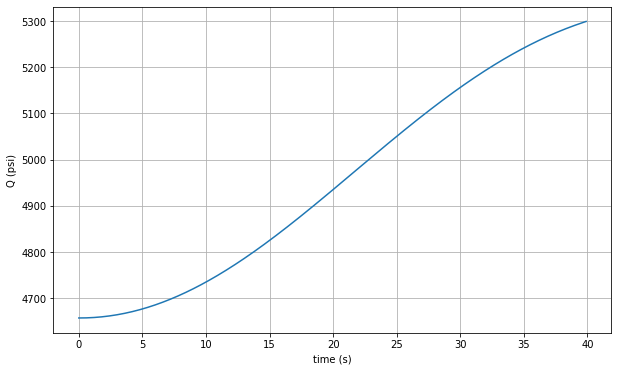

In [7]:
shortTime = time[0:int(40/timestep)]
fig1 = plt.figure(figsize=(10,6))
ax11 = fig1.add_subplot(1,1,1)
ax11.plot(shortTime,thrust[:len(shortTime)])
ax11.set_title('')
ax11.set_xlabel('time (s)')
ax11.set_ylabel('Q (psi)')
ax11.grid()
plt.show()

/Users/Confusion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


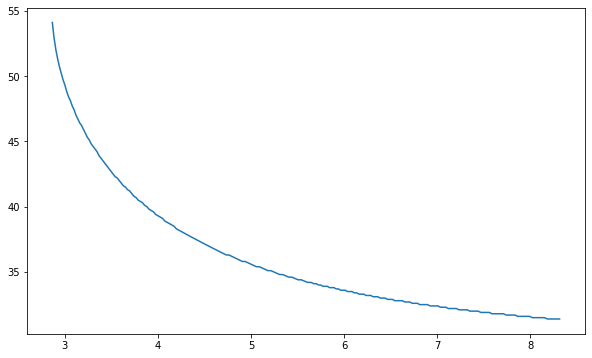

In [8]:
gamma = 7/5
def tantheta(M,B):
    b = np.radians(B)
    num = 2*((M**2)*(np.sin(b)**2) - 1)
    den = np.tan(b)*((M**2)*(gamma + (np.cos(b)**2)) + 2)
    return num/den

maxmach = max(mach[:len(shortTime)])
realTheta = 21.27
realB = []
highM = []

for m in mach[:len(shortTime)]:
    if m >= 1:
        for B in np.arange(0,90,0.1):
            if tantheta(m,B) > np.tan(np.radians(realTheta)):
                realB.append(B)
                highM.append(m)
                break

fig1 = plt.figure(figsize=(10,6))
p = plt.plot(highM,realB)

# eng File Writer

The below cell writes .eng files for the previously simulated rocket, allowing it to be used in OpenRocket.

In [9]:
suffix = str(input('Enter a label here for the .eng file: '))
diam = 406.4
he_len = 2413
lox_len = 2800
rp1_len = 1727
kgRp1 = unit.lbToKg(mRP1)
kgLox = unit.lbToKg(mLOx)
kgHe = unit.lbToKg(mHe)

#S refers to a tank not providing thrust
def startline(diam,length,mass,name,isS):
    if isS:
        s = '-S'
    else:
        s = ''
    motorname = name + '-' + str(int(diameter)) + '-' + suffix + s
    returnstring = '{motor} {diameter} {length} P {lowmass} {highmass} RPL'.format(motor=motorname, 
        diameter=diam, 
        length=int(length),
        lowmass=round(mass,2),
        highmass=round(mass+0.01,2))
    return returnstring

lox_start = startline(diam,lox_len,kgLox,'LOx',True)
rp1_start = startline(diam,rp1_len,kgRp1,'RP1',False)
he_start = startline(diam,he_len,kgHe,'HE',True)

def makeTank(diam,length,mass,name,isS):
    start = startline(diam,length,mass,name,isS)
    shorttime = burntime - 0.001
    longtime = burntime
    if isS:
        thrusts = '\n   0.001  0.01 \n   {shorttime} 0.01 \n   {longtime}     0.00'.format(shorttime=shorttime,longtime=longtime)
    else:
        datanum = int(burntime/2)
        thrustinter = inter.CubicSpline(time[:int(burntime/timestep)],thrust[:int(burntime/timestep)])
        thrusts = ''
        for i in range(datanum+1):
            if i == 0:
                thrusts += ' \n   0.001  {} \n'.format(unit.lbfToN(thrustinter(0)))
            elif i == datanum:
                thrusts += '   {shorttime} {shortthrust} \n   {longtime}     0.00'.format(shorttime=shorttime,
                                                                                      longtime=longtime,
                                                                                      shortthrust=unit.lbfToN(thrustinter(longtime)))
            elif i >= 5:
                thrusts += '   {nexttime}     {nextthrust} \n'.format(nexttime=i*2,nextthrust=unit.lbfToN(thrustinter(i*2)))
            else:
                thrusts += '   {nexttime}      {nextthrust} \n'.format(nexttime=i*2,nextthrust=unit.lbfToN(thrustinter(i*2)))
    return start + thrusts

with open('LOx_tank_{d}_{suf}_S.eng'.format(d=diameter,suf=suffix), 'w') as loxfile:
    loxstring = makeTank(diam,lox_len,kgLox,'LOx',True)
    loxfile.write(loxstring)

with open('He_tank_{d}_{suf}_S.eng'.format(d=diameter,suf=suffix), 'w') as hefile:
    hestring = makeTank(diam,he_len,kgHe,'HE',True)
    hefile.write(hestring)

with open('RP1_tank_{d}_{suf}.eng'.format(d=diameter,suf=suffix), 'w') as rp1file:
    rp1string = makeTank(diam,rp1_len,kgRp1,'RP1',False)
    rp1file.write(rp1string)

Enter a label here for the .eng file:  WB
